# Proyek Analisis Data: Bike Sharing Dataset
*   **Nama:**Aksamala Citrayuh Anasita
*   **Email**: aksamalacitrayuh@gmail.com
* **ID Coding:** MC006D5X1415



# Menentukan Pertanyaan Bisnis
1.   Pada bulan apa jumlah penyewaan sepeda tertinggi terjadi?
2.   Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
3. Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur?



# Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


Membaca Data

In [21]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

Menampilkan 5 baris pertama data

In [22]:
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

# Data Wrangling
Dalam Data Wrangling, dilakukan pengecekan informasi dataset, penanganan nilai yang hilang, konversi kolom tanggal ke format datetime, serta identifikasi dan penghapusan data duplikat untuk memastikan data siap dianalisis.

## Gathering Data

Cek informasi dataset

In [23]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Cek nilai yang hilang

In [24]:
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight**
* Tidak ada nilai yang hilang pada dataset, sehingga tidak perlu dilakukan imputasi data (Imputasi adalah proses menggantikan nilai yang hilang dalam suatu dataset dengan nilai yang diperkirakan atau dihitung berdasarkan data yang tersedia.).
* Dataset sudah siap untuk dianalisis lebih lanjut.

## Assessing Data
Assessing data pada kode berikut dilakukan untuk pengecekan dan konversi kolom tanggal ke format datetime agar lebih mudah digunakan dalam analisis berbasis waktu.

Mengonversi kolom tanggal ke format datetime

In [25]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Menampilkan data setelah konversi

In [26]:
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
*   Kolom tanggal telah dikonversi agar lebih mudah dalam analisis berbasis waktu.
*   Data bisa digunakan untuk analisis tren musiman dan pola penggunaan harian.



## Cleaning Data
Mengecek dan menghapus duplikat jika ada

In [27]:
duplicate_rows_day = day_df.duplicated().sum()
duplicate_rows_hour = hour_df.duplicated().sum()

In [28]:
print(f"Jumlah duplikat pada day.csv: {duplicate_rows_day}")
print(f"Jumlah duplikat pada hour.csv: {duplicate_rows_hour}")

if duplicate_rows_day > 0:
    day_df = day_df.drop_duplicates()
    print("Duplikat pada day.csv telah dihapus.")

if duplicate_rows_hour > 0:
    hour_df = hour_df.drop_duplicates()
    print("Duplikat pada hour.csv telah dihapus.")

Jumlah duplikat pada day.csv: 0
Jumlah duplikat pada hour.csv: 0


**Insight:**
- Jika ada duplikat, data telah dibersihkan agar lebih akurat.
- Data siap untuk eksplorasi lebih lanjut.


# Exploratory Data Analysis (EDA)

## Explore Statistik Deskriptif

In [29]:
display(day_df.describe())
display(hour_df.describe())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**
* Jumlah penyewaan sepeda memiliki distribusi yang bervariasi, dengan beberapa puncak yang menandakan hari atau musim tertentu lebih banyak digunakan.
* Faktor cuaca, musim, dan hari kerja kemungkinan besar mempengaruhi jumlah peminjaman.


# Visualization & Explanatory Analysis

## Pertanyaan 1:
Pada bulan apa jumlah penyewaan sepeda tertinggi terjadi?

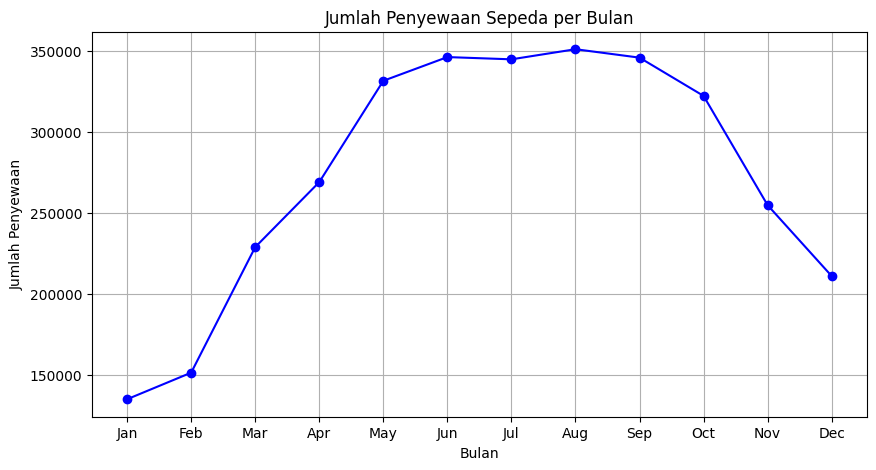

In [38]:
day_df['month'] = day_df['dteday'].dt.month
monthly_rentals = day_df.groupby('month')['cnt'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_rentals.index, monthly_rentals.values, marker='o', linestyle='-', color='b')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Bulan")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

**Insight**
* Penyewaan sepeda tertinggi terjadi pada bulan Agustus
* Diagram line chart dipilih untuk menunjukkan tren perubahan jumlah penyewaan sepeda dari bulan ke bulan, sehingga memudahkan identifikasi pola musiman dan bulan dengan penyewaan tertinggi.

## Pertanyaan 2:
Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

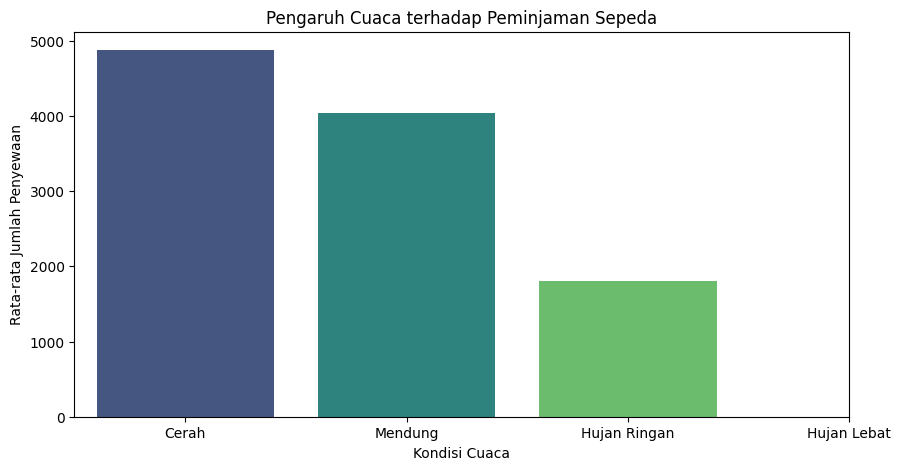

In [39]:
weather_rentals = day_df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=weather_rentals.index.astype(str), y=weather_rentals.values, hue=weather_rentals.index.astype(str), palette='viridis', dodge=False)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

**Insight**
* Cuaca cerah berkontribusi pada jumlah penyewaan tertinggi.
* Saat hujan deras, jumlah penyewaan sepeda menurun drastis.
* Diagram batang dipilih karena efektif dalam membandingkan rata-rata jumlah penyewaan sepeda pada setiap kondisi cuaca secara visual, sehingga perbedaan tren antara cuaca cerah, mendung, hujan ringan, dan hujan lebat dapat terlihat dengan jelas.

## Pertanyaan 3:
Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur?

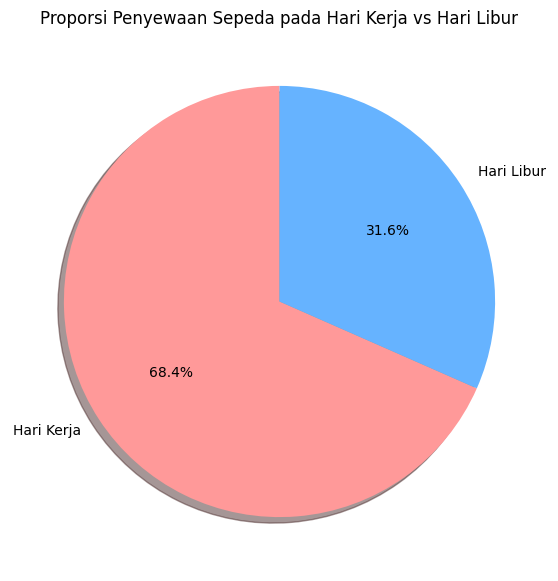

In [42]:
workingday_counts = day_df['workingday'].value_counts()
labels = ['Hari Kerja', 'Hari Libur']
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(7,7))
plt.pie(workingday_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Proporsi Penyewaan Sepeda pada Hari Kerja vs Hari Libur")
plt.show()

**Insight**
* Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan banyak orang menggunakan sepeda untuk keperluan transportasi.
* Pada hari libur, jumlah peminjaman tetap signifikan, namun sedikit lebih rendah dibandingkan hari kerja.
* Pie chart digunakan untuk menunjukkan proporsi penyewaan sepeda pada hari kerja dan hari libur secara visual, di mana terlihat bahwa penyewaan lebih tinggi pada hari kerja dibandingkan hari libur.

# Analisis Lanjutan

## RFM Analysis (Recency, Frequency, Monetary)

In [40]:
rfm_df = day_df.groupby('instant').agg({
    'dteday': 'max',  # Recency
    'cnt': 'count',    # Frequency
    'cnt': 'sum'       # Monetary
}).reset_index()

rfm_df.rename(columns={'dteday': 'Recency', 'cnt': 'Frequency', 'cnt': 'Monetary'}, inplace=True)
display(rfm_df.head())

,instant,Recency,Monetary
0,1,2011-01-01,985
1,2,2011-01-02,801
2,3,2011-01-03,1349
3,4,2011-01-04,1562
4,5,2011-01-05,1600


## Clustering (Manual Grouping & Binning)

In [41]:
day_df['usage_category'] = pd.cut(day_df['cnt'], bins=[0, 1000, 3000, 5000, 10000], labels=['Low', 'Medium', 'High', 'Very High'])
display(day_df[['cnt', 'usage_category']].head())

,cnt,usage_category
0,985,Low
1,801,Low
2,1349,Medium
3,1562,Medium
4,1600,Medium


# Conclusion

- Bulan dengan jumlah penyewaan tertinggi adalah bulan Agustus.
- Cuaca sangat mempengaruhi jumlah penyewaan, di mana saat hujan jumlah peminjaman menurun drastis.
- Hari kerja memiliki jumlah peminjaman lebih tinggi dibandingkan hari libur, menunjukkan bahwa banyak pengguna sepeda menggunakan layanan ini untuk keperluan transportasi sehari-hari.
- RFM Analysis menunjukkan pola penggunaan sepeda berdasarkan frekuensi dan total peminjaman, yang dapat membantu dalam segmentasi pengguna untuk strategi pemasaran atau peningkatan layanan.
- Clustering dengan binning berhasil mengelompokkan pengguna ke dalam beberapa kategori berdasarkan intensitas peminjaman sepeda, yang bisa digunakan untuk memahami perilaku pengguna dengan lebih baik.